# Cardiovascular Disease Prediction Using ML Models
This notebook performs data preprocessing, training, and evaluation of four ML models on a public cardiovascular disease dataset.

In [25]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb


In [27]:
# 2. Load and preprocess the data
df = pd.read_csv(r"C:\Users\fanha\OneDrive\Desktop\cardio_train.csv", sep=';')
df.drop('id', axis=1, inplace=True)
df['age'] = df['age'] // 365  # Convert age from days to years


In [29]:
# Show basic info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB
None
                age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      52.840671      1.349571    164.359229     74.205690    128.817286   
std       

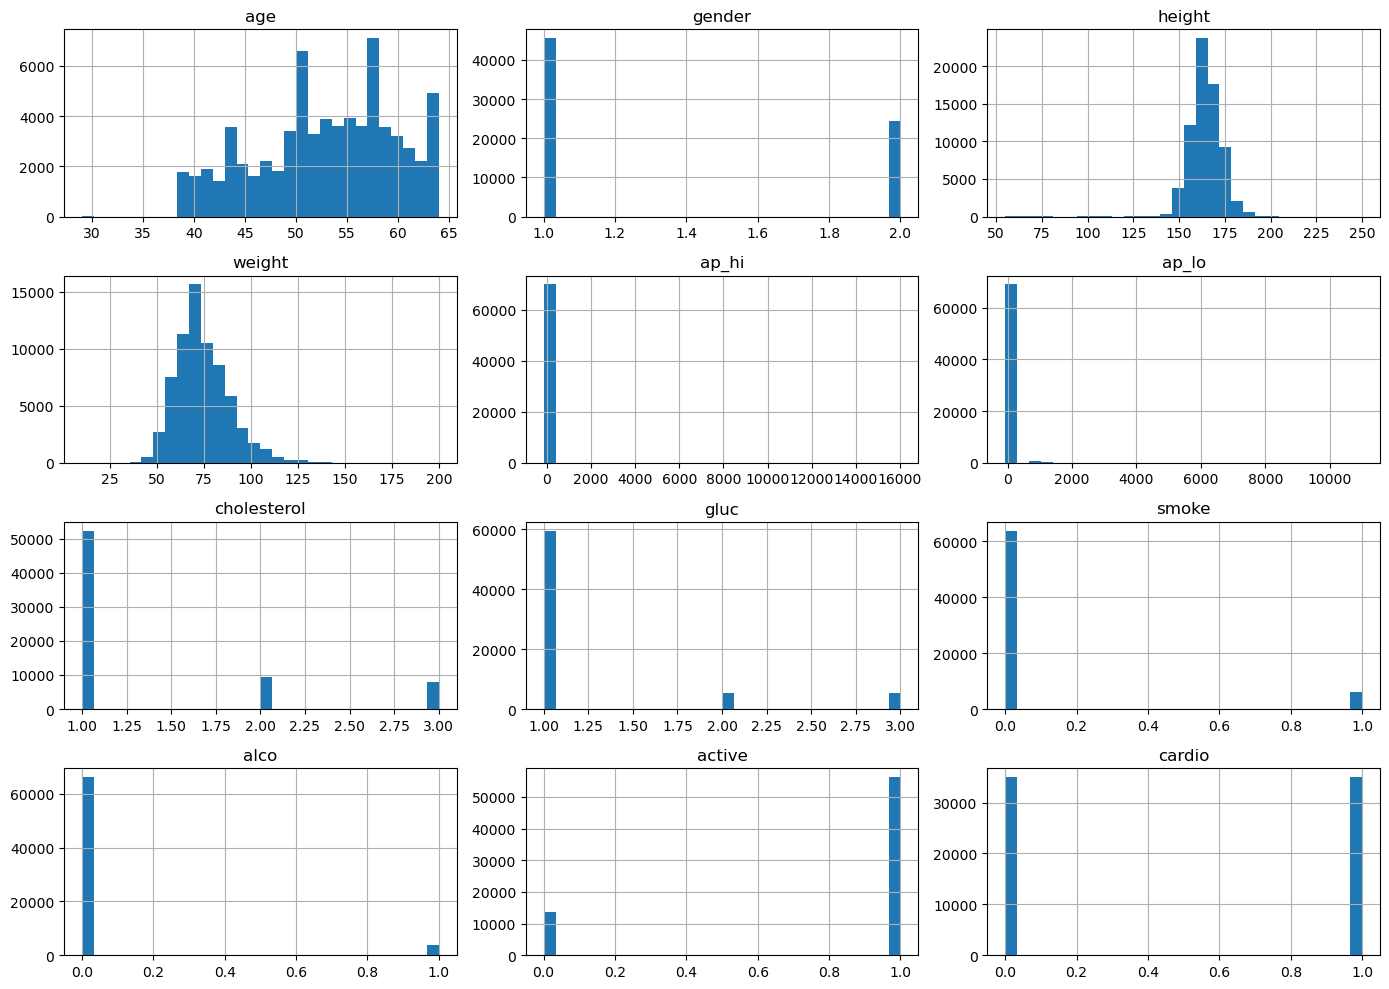

In [31]:
# Histograms for all numeric features
df.hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()


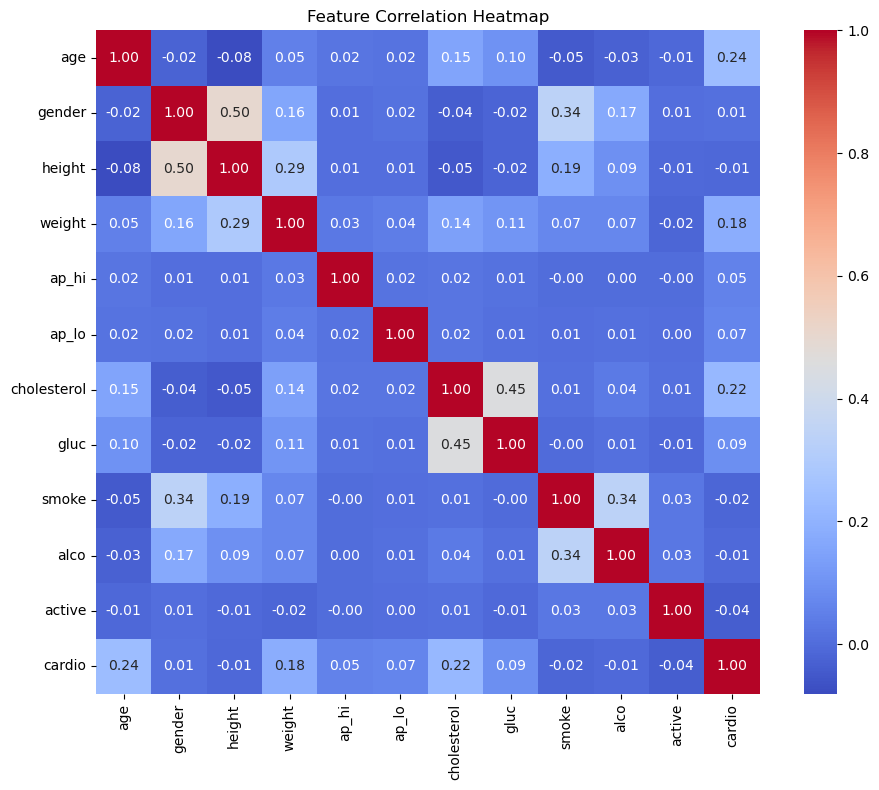

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


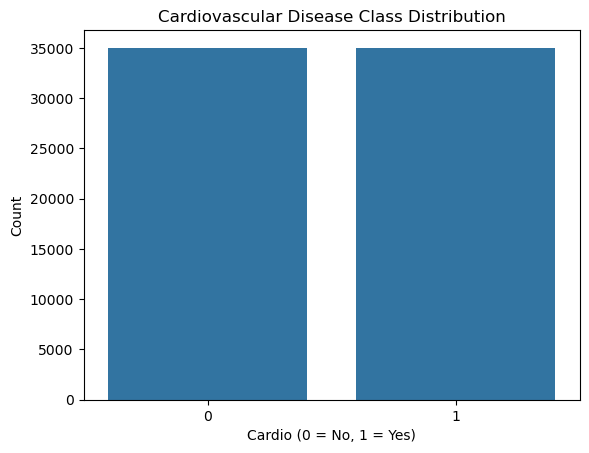

In [35]:
sns.countplot(x='cardio', data=df)
plt.title("Cardiovascular Disease Class Distribution")
plt.xlabel("Cardio (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


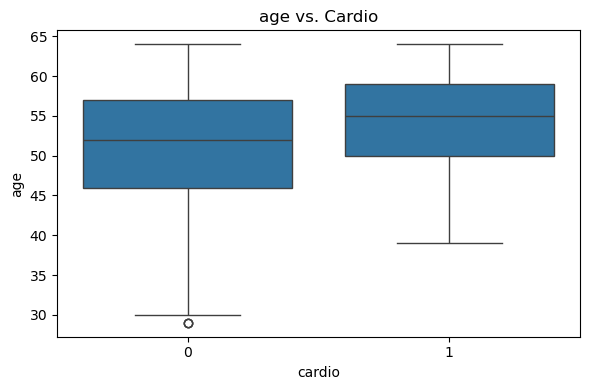

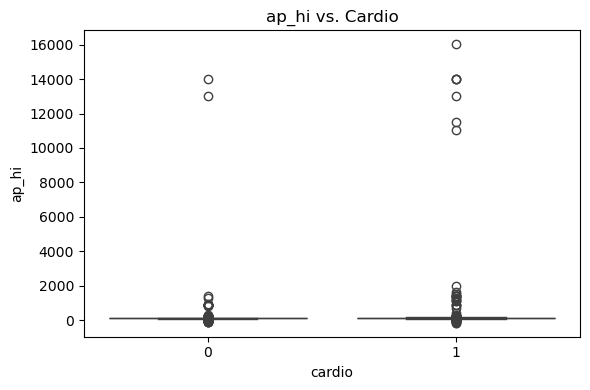

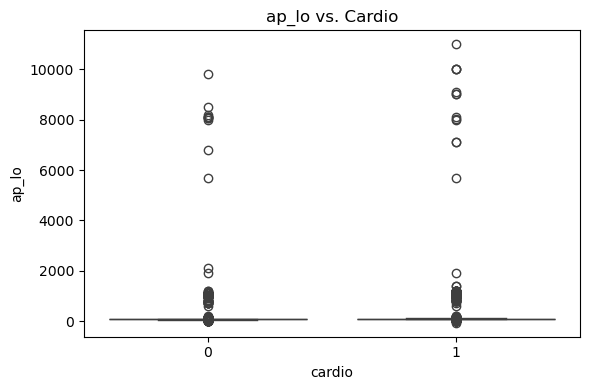

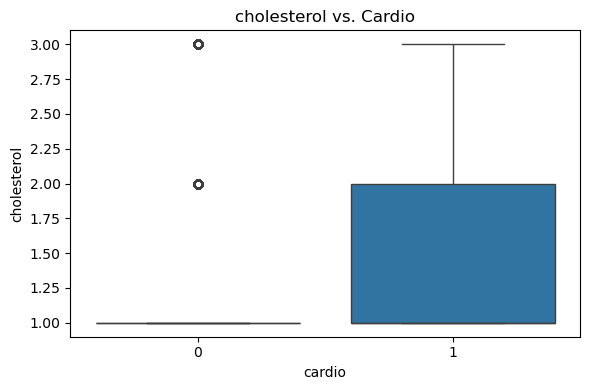

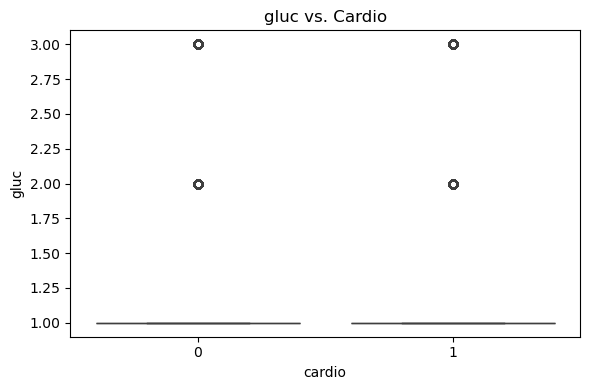

In [37]:
features_to_plot = ['age', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
for col in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cardio', y=col, data=df)
    plt.title(f"{col} vs. Cardio")
    plt.tight_layout()
    plt.show()


In [39]:
# 3. Feature preparation
X = df.drop('cardio', axis=1)
y = df['cardio']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [41]:
# 4. Train models and evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba),
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'ROC Curve': roc_curve(y_test, y_proba)
    }

summary_df = pd.DataFrame({model: {metric: round(score, 3) for metric, score in scores.items() if isinstance(score, float)} for model, scores in results.items()}).T
print(summary_df)


C:\Users\fanha\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:59:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                     Accuracy  Precision  Recall  F1 Score  ROC AUC
Logistic Regression     0.723      0.744   0.679     0.710    0.786
Random Forest           0.708      0.709   0.707     0.708    0.762
SVM                     0.732      0.747   0.702     0.724    0.789
XGBoost                 0.737      0.757   0.699     0.727    0.798


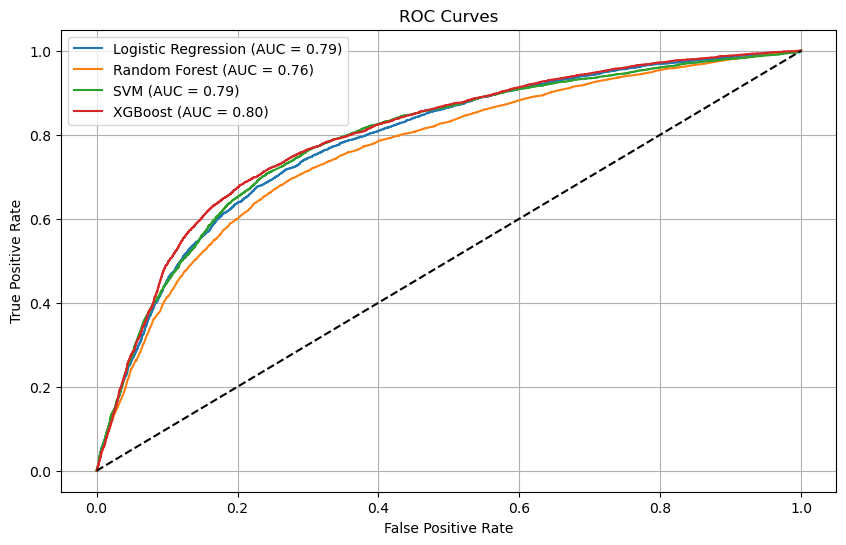

In [42]:
# 5. Plot ROC curves
plt.figure(figsize=(10, 6))
for name, scores in results.items():
    fpr, tpr, _ = scores['ROC Curve']
    plt.plot(fpr, tpr, label=f"{name} (AUC = {scores['ROC AUC']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


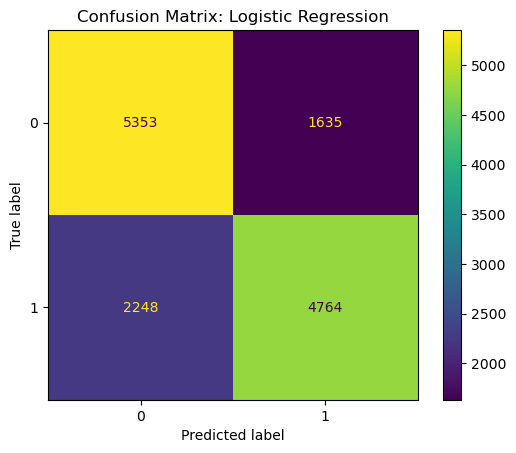

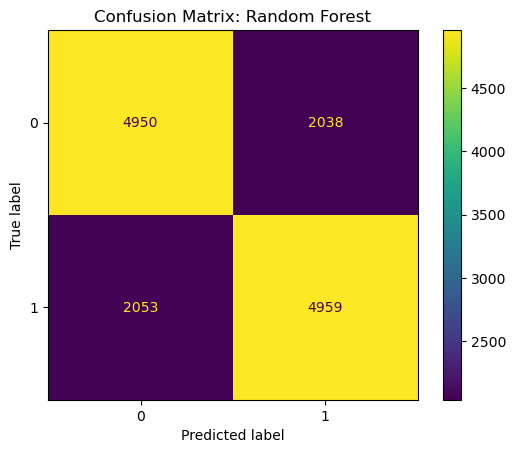

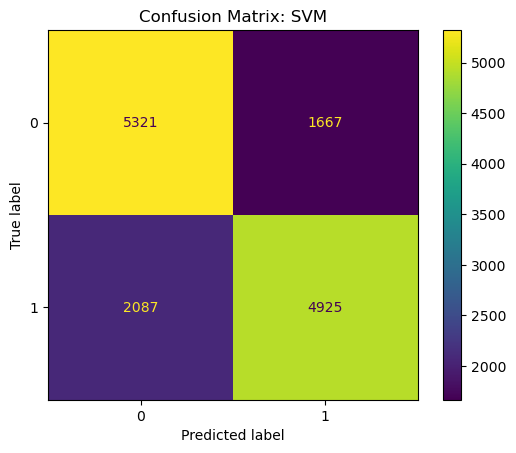

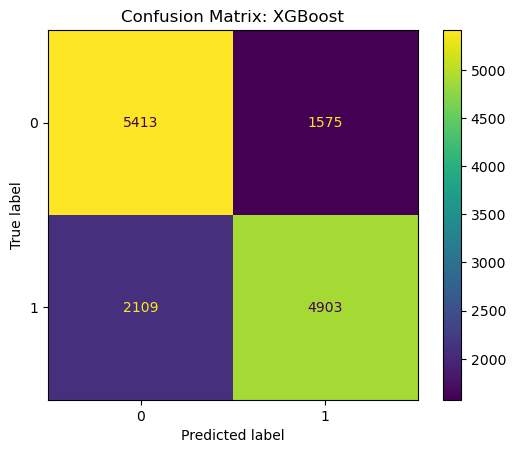

In [43]:
# 6. Plot confusion matrices
for name, scores in results.items():
    disp = ConfusionMatrixDisplay(confusion_matrix=scores['Confusion Matrix'])
    disp.plot()
    plt.title(f"Confusion Matrix: {name}")
    plt.show()


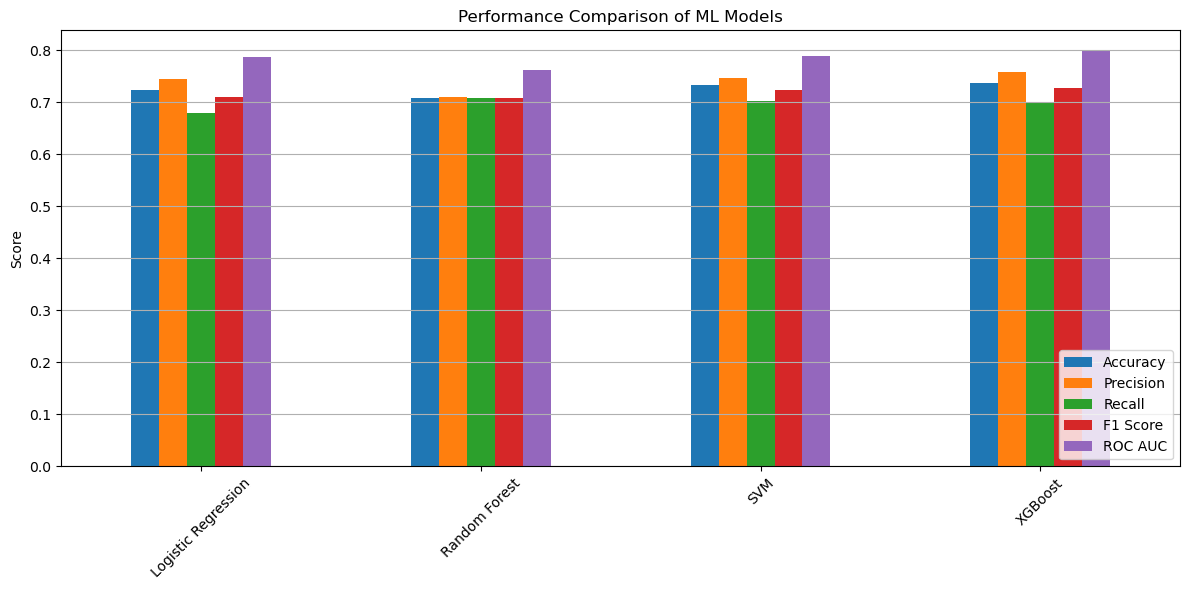

In [44]:
# 7. Bar chart comparing metrics
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
summary_df[metrics_to_plot].plot(kind='bar', figsize=(12, 6))
plt.title('Performance Comparison of ML Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
